In [ ]:
import json
import ast
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
from shared import generate

### **Identify and Explain Issue**

In [ ]:
def identify_explain_indirect(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nIn the dialogue above, Speaker 2 responds to speaker 1. Decide who is at fault for the communication breakdown observed, Speaker 1, Speaker 2 or both? Explain your decision. One of the two speakers is autistic. You must output a dictionary formatted exactly as follows with no extra tags or text: { "fault":"Speaker #", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [ ]:
with open('indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Are you aware of what the new deadline is?',
  'Speaker 2': 'Yes, I know about the deadline.'},
 {'Speaker 1': 'Can you tell me where the files are saved?',
  'Speaker 2': 'Yes, I can.'}]

In [ ]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = identify_explain_indirect(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [ ]:
with open('indirect_analysis_data/identify_explain.json', 'w') as f:
    json.dump(results, f, indent=2)


In [ ]:
with open('indirect_analysis_data/identify_explain.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'fault': 'Speaker 1',
  'explanation': "Speaker 1 asked a clear question about the new deadline, seeking confirmation or additional details. However, Speaker 2's response was vague and did not provide any new information or context about the deadline itself, potentially leading to confusion. Since the purpose of the question was to clarify understanding and it was not fulfilled by Speaker 2’s response, Speaker 1’s need for clarity highlights a breakdown in communication."},
 {'fault': 'Speaker 2',
  'explanation': "Speaker 2's response, while affirmative, lacks any informative content regarding the location of the files. Speaker 1 is seeking specific information, and by only stating 'Yes, I can' without providing further details, Speaker 2 fails to fulfill the communicative intention of Speaker 1. Therefore, the breakdown is primarily due to Speaker 2 not delivering the requested information."}]

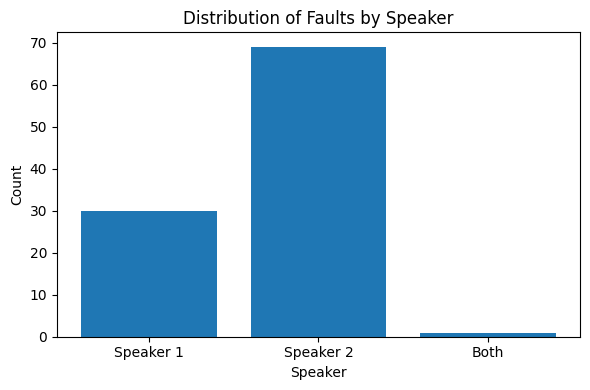

In [ ]:
normalized_faults = []
for r in results_loaded:
    fault = r['fault'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    else:
        normalized_faults.append("Both")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Faults by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Feedback on How Communication Can be Improved**

In [ ]:
def provide_feedback(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nIn the dialogue above, Speaker 1 uses an indirect speech act and Speaker 2 responds to it literally. As a communication expert, what feedback would you provide to the speaker(s)? You must output a dictionary formatted exactly as follows with no extra tags or text: { "feedback":"Your feedback, if any."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [ ]:
with open('indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Are you aware of what the new deadline is?',
  'Speaker 2': 'Yes, I know about the deadline.'},
 {'Speaker 1': 'Can you tell me where the files are saved?',
  'Speaker 2': 'Yes, I can.'}]

In [ ]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = provide_feedback(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(10)))


In [ ]:
with open('indirect_analysis_data/provide_feedback.json', 'w') as f:
    json.dump(results, f, indent=2)


In [ ]:
with open('indirect_analysis_data/provide_feedback.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]


[{'feedback': "Speaker 1's indirect speech act was appropriately understood by Speaker 2, so no adjustment is necessary. However, Speaker 2 could be more specific in their response, perhaps providing the actual deadline information, to further the conversation effectively."},
 {'feedback': "Speaker 1's question is indirectly asking for the location of the files, while Speaker 2's response only confirms their ability to tell the location but does not provide it. Speaker 2 should directly address the implied request by providing the location of the files."},
 {'feedback': "Speaker 1 effectively used an indirect speech act to inquire about the status of the project without explicitly asking. Speaker 2's literal response appropriately addresses the inquiry, but could be improved to be more informative or specific about the project's status or progress. For a more effective response, Speaker 2 could provide an update on their thoughts or progress regarding the project to facilitate clearer 

### **Identify Autistic Speaker**


In [ ]:
def identify_autistic_speaker(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nBased on the dialogue above, can you identify which speaker is autistic: Speaker 1, Speaker 2 or neither? Explain your decision. You must output a dictionary formatted exactly as follows with no extra tags or text: { "autistic":"Speaker # or neither", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [ ]:
with open('indirect_generated_data/indirect_workplace.json') as f:
    indirect_statements_generated_workplace = json.load(f)
    
indirect_statements_generated_workplace[0:2]


[{'Speaker 1': 'Can you tell me if the presentation is ready?',
  'Speaker 2': 'Yes, I can tell you.'},
 {'Speaker 1': 'Do you know when the meeting starts?',
  'Speaker 2': 'Yes, I know the start time.'}]

In [ ]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = identify_autistic_speaker(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [ ]:
with open('indirect_analysis_data/autistic_speaker.json', 'w') as f:
    json.dump(results, f, indent=2)


In [ ]:
with open('indirect_analysis_data/autistic_speaker.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'autistic': 'neither',
  'explanation': 'The provided dialogue is too brief and lacks sufficient context to determine if either speaker is autistic. Both speakers exhibit typical conversational patterns without any clear indicators of autistic characteristics. Autistic traits are often more evident in longer interactions where social communication differences might be more observable.'},
 {'autistic': 'neither',
  'explanation': 'Based on the provided dialogue, there is not enough information to determine if either speaker is autistic. The exchange is brief and does not contain any specific indicators or characteristics that are commonly associated with autism. Therefore, it would be inappropriate to conclude that either speaker is autistic from this dialogue alone.'}]

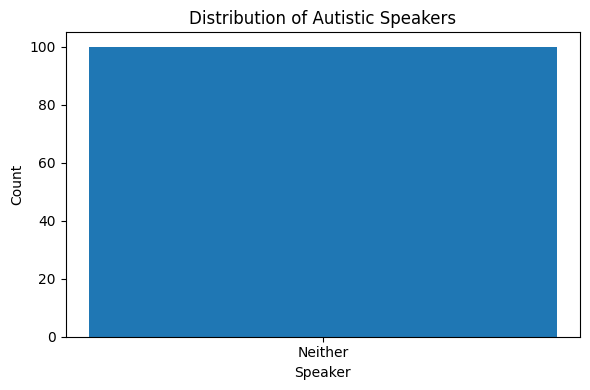

In [ ]:
normalized_faults = []
for r in results_loaded:
    fault = r['autistic'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Autistic Speakers")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
